In [1]:
#Downloading Relevant Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold
from tqdm.auto import tqdm



In [2]:
data=pd.read_csv("AER_credit_card_data.csv")
data.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [3]:
#Exploratory Data Analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 123.8+ KB


In [4]:
#No null Values
data.isnull().sum()

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

In [5]:
#map the values yes --> 1 no --> 0
data['card'] = data['card'].map({'yes': 1, 'no': 0})


In [6]:
data.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [7]:
#Splitting the data
Y=data["card"]
X=data.drop(["card"],axis=1)

In [8]:
X_full_train, X_test,Y_full_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=1)
X_train,X_val,Y_train,Y_val = train_test_split(X_full_train,Y_full_train, test_size=0.25, random_state=1)

In [9]:
Numerical_col=["reports","age","income","share","expenditure","dependents","months","majorcards","active"]

In [10]:
# Calculate the auc
auc_score=np.zeros((len(Numerical_col)))
for i in range(len(Numerical_col)):
    auc_score[i]=roc_auc_score(Y_train,X_train[Numerical_col[i]])

    

In [11]:
auc_score

array([0.28333701, 0.4759979 , 0.59080495, 0.98918364, 0.99104235,
       0.46722428, 0.47057822, 0.53438598, 0.60431734])

In [12]:
#Inverting the columns
for i in range(len(Numerical_col)):
    if auc_score[i]<0.5:
        X_train[Numerical_col[i]]=-1*X_train[Numerical_col[i]]
        X_val[Numerical_col[i]]=-1*X_val[Numerical_col[i]]
        

<ipython-input-12-952b18172470>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[Numerical_col[i]]=-1*X_train[Numerical_col[i]]
<ipython-input-12-952b18172470>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val[Numerical_col[i]]=-1*X_val[Numerical_col[i]]


In [13]:
X_train.head()

,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
1105,-3,-40.50000,4.0128,0.000299,0.00000,no,no,-1,-12,1,17
431,-1,-32.33333,6.0000,0.000200,0.00000,yes,no,-4,-18,1,4
407,-1,-29.16667,2.2000,0.038205,69.79333,no,no,0,-49,1,7
1217,-1,-54.66667,7.2900,0.106536,647.20670,yes,no,-2,-78,1,9
1133,0,-25.00000,3.3984,0.000353,0.00000,yes,no,-2,-29,0,4


In [14]:
#find the variable with the highest AUC score
# feature has the smallest difference
max_score=np.max(auc_score)
maximum_index=np.where(auc_score==max_score)
Numerical_col[maximum_index[0][0]]


'expenditure'

In [15]:
#target columns
target_columns=["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]

In [16]:
X_train=X_train[target_columns]
X_val=X_val[target_columns]

In [17]:
# apply DictVectorizer
model=LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [18]:
dv = DictVectorizer(sparse=False)
X_train= X_train.to_dict(orient='records')
X_train = dv.fit_transform(X_train)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [19]:
#compute the auc model
X_val = X_val.to_dict(orient='records')
X_val = dv.transform(X_val)
y_pred = model.predict_proba(X_val)[:, 1]


In [20]:
fpr, tpr, thresholds = roc_curve(Y_val, y_pred)

In [21]:
print("AUC Value =",auc(fpr, tpr))

AUC Value = 0.995171242063847


In [22]:
#Computing precision,recall,F1
thresholds = np.arange(0, 1, 0.01)

precision= []
recall=[]
f1=[]

for t in thresholds:
    actual_positive = (Y_val == 1)
    actual_negative = (Y_val == 0)
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    pr=tp / (tp + fp)
    re=tp / (tp + fn)
    f=(2*pr*re)/(pr+re)
    precision.append(pr)
    recall.append(re)
    f1.append(f)
    
    
    

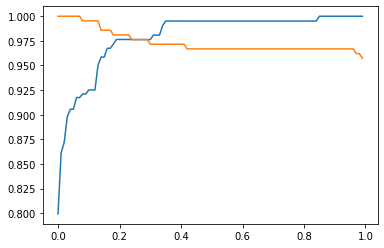

In [23]:
plt.plot(thresholds,precision)
plt.plot(thresholds,recall)
#as we can see they meet at around 0.3 value


In [24]:
#calculating the threshold with the greatest F1 score
max_index=f1.index(max(f1))
thresholds[max_index]

0.35000000000000003

In [25]:
#Cross Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
scores = []
for train_idx, val_idx in kfold.split(X_full_train):
    X_train = X_full_train.iloc[train_idx]
    X_val = X_full_train.iloc[val_idx]

    y_train = Y_full_train.iloc[train_idx]
    y_val = Y_full_train.iloc[val_idx]
    dv = DictVectorizer(sparse=False)
    X_train= X_train.to_dict(orient='records')
    X_train = dv.fit_transform(X_train)
    model =LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train,y_train)
    X_val = X_val.to_dict(orient='records')
    X_val = dv.transform(X_val)
    y_pred = model.predict(X_val)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

In [26]:
#Calculatethe standard deviation
print("Standard Deviation",np.std(scores))

Standard Deviation 0.011596469127928001


In [27]:
X_full_train, X_test,Y_full_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=1)
X_train,X_val,Y_train,Y_val = train_test_split(X_full_train,Y_full_train, test_size=0.25, random_state=1)

In [28]:
n_splits = 5

for C in tqdm([ 0.01, 0.1, 1, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(X_full_train):
        X_train = X_full_train.iloc[train_idx]
        X_val = X_full_train.iloc[val_idx]

        y_train = Y_full_train.iloc[train_idx]
        y_val = Y_full_train.iloc[val_idx]
        dv = DictVectorizer(sparse=False)
        X_train= X_train.to_dict(orient='records')
        X_train = dv.fit_transform(X_train)
        model =LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        model.fit(X_train,y_train)
        X_val = X_val.to_dict(orient='records')
        X_val = dv.transform(X_val)
        y_pred = model.predict(X_val)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
        
      

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/4 [00:00<?, ?it/s]

C=0.01 0.987 +- 0.007
C=0.1 0.985 +- 0.010
C=1 0.983 +- 0.012
C=10 0.978 +- 0.014


In [ ]:
# the best value of C is 0.01